In [1]:
import windIO
from windIO.utils.yml_utils import validate_yaml, Loader, load_yaml
from foxes_api import runFoxes
from pywake_api import run_pywake
import os
import xarray as xr
from windIO.utils import plant_schemas_path
import matplotlib.pyplot as plt

/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
yml_input = '../examples/cases/windio_4turbines/wind_energy_system/FLOW_toy_study_wind_energy_system.yaml'
os.makedirs('output', exist_ok=True)

In [3]:
validate_yaml(yml_input, plant_schemas_path + 'wind_energy_system.yaml')

Validation succeeded


In [4]:
runFoxes(yml_input)

Reading windio file ../examples/cases/windio_4turbines/wind_energy_system/FLOW_toy_study_wind_energy_system.yaml
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['site', 'wind_farm', 'attributes']
Reading site
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['boundaries', 'energy_resource']
Ignoring variable 'friction_velocity'
Reading wind farm
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['layouts', 'turbines']
Reading attributes
  Contents: ['flow_model', 'analysis', 'outputs']
Creating windio runner
Creating algorithm 'Downwind'
Running farm_calc


In [5]:
run_pywake(yml_input)

(2,) ()
aep is  <xarray.DataArray 'AEP [GWh]' ()>
array(175.87182444) GWh
(0.50 capcacity factor)
<xarray.SimulationResult>
Dimensions:      (wt: 4, time: 2)
Coordinates:
  * time         (time) int64 0 1
  * wt           (wt) int64 0 1 2 3
    wd           (time) float64 271.8 266.2
    ws           (time) float64 10.09 10.23
    type         (wt) float64 0.0 0.0 0.0 0.0
Data variables: (12/14)
    WS_eff       (wt, time) float64 10.09 10.23 9.139 8.535 ... 8.027 8.72 7.788
    TI_eff       (wt, time) float64 2.619 1.537 2.622 ... 1.543 2.622 1.543
    Power        (wt, time) float64 7.056e+03 7.378e+03 ... 4.577e+03 3.262e+03
    CT           (wt, time) float64 0.814 0.814 0.814 ... 0.814 0.814 0.8233
    yaw          int64 0
    tilt         int64 0
    ...           ...
    y            (wt) int64 0 0 0 0
    WD           (time) float64 271.8 266.2
    TI           (time) float64 2.619 1.537
    wd_bin_size  float64 -5.623
    WS           (time) float64 10.09 10.23
    P          

<xarray.DataArray 'AEP [GWh]' ()>
array(175.87182444)

In [6]:
dat = xr.load_dataset('output/PowerTable.nc')
dat

<xarray.Dataset>
Dimensions:               (wt: 4, time: 2)
Coordinates:
  * time                  (time) int64 0 1
  * wt                    (wt) int64 0 1 2 3
    wd                    (time) float64 271.8 266.2
    ws                    (time) float64 10.09 10.23
    type                  (wt) float64 0.0 0.0 0.0 0.0
Data variables:
    power                 (wt, time) float64 7.056e+03 7.378e+03 ... 3.262e+03
    effective_wind_speed  (wt, time) float64 10.09 10.23 9.139 ... 8.72 7.788

Text(0, 0.5, 'Power (kW)')

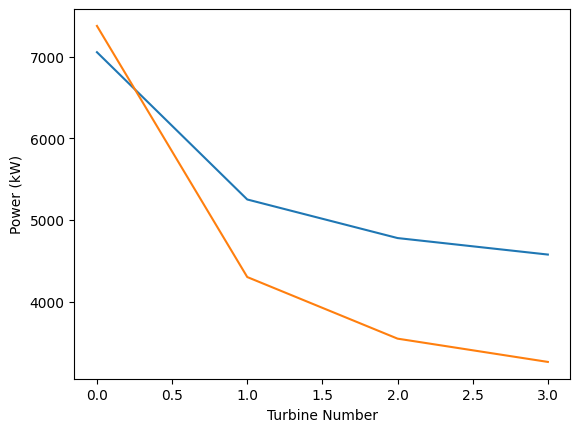

In [7]:
plt.plot(dat.wt, dat.power)
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')